In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Regression with a Mohs Hardness Dataset/Data/train.csv") 
test = pd.read_csv("../Regression with a Mohs Hardness Dataset/Data/test.csv")

In [36]:
df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [37]:
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [38]:
y_train = df['Hardness']
df = df.drop(['Hardness'], axis=1)

### **Data Cleaning**

No missing value so we don't need to bother about doing data cleaning.

In [39]:
df.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

### **EDA**

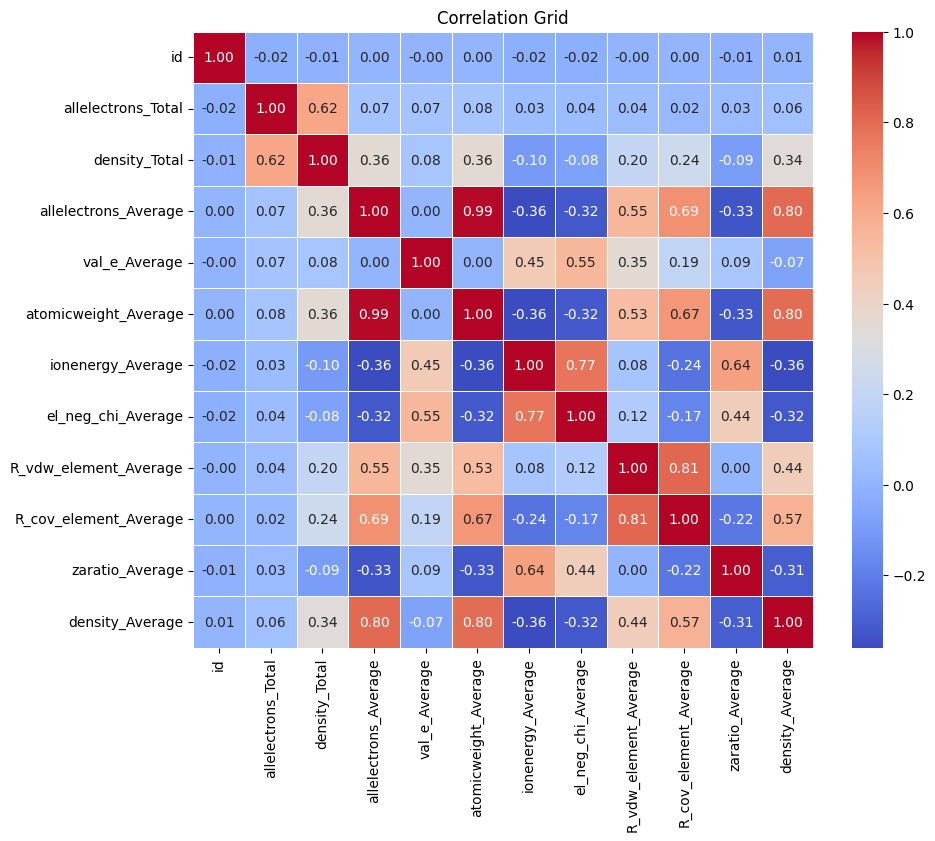

In [40]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Grid')
plt.show()

By looking at it, it is obvious that `ID` and `allelectrons_Total` doesn't correlate much with other feature. So we should just drop it.

In [41]:
df = df.drop(['id', 'allelectrons_Total'], axis=1)
test= test.drop(['id', 'allelectrons_Total'], axis=1)

In [42]:
y_train

0        6.0
1        6.5
2        2.5
3        6.0
4        6.0
        ... 
10402    4.0
10403    5.0
10404    1.8
10405    6.0
10406    6.5
Name: Hardness, Length: 10407, dtype: float64